In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Specify input parameters
input_parameters = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age"
]


In [ ]:
# Load and preprocess the data
def load_data(file_path):
    data = pd.read_csv(file_path)
    X = data[input_parameters]
    y = data['Outcome']
    return X, y


In [ ]:
# Create the neural network model
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
# Function to make predictions
def predict_diabetes(model, scaler, input_data):
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return (prediction > 0.5).astype(int)[0][0]


In [ ]:
# Function to create input space
def create_input_space():
    input_space = {param: None for param in input_parameters}
    return input_space


In [ ]:
# Function to gather manual input from user
def get_manual_input(input_space):
    print("Please enter the following health data for diabetes prediction:")

    input_space['Pregnancies'] = int(input("Pregnancies: "))
    input_space['Glucose'] = float(input("Glucose: "))
    input_space['BloodPressure'] = float(input("Blood Pressure: "))
    input_space['SkinThickness'] = float(input("Skin Thickness: "))
    input_space['Insulin'] = float(input("Insulin: "))
    input_space['BMI'] = float(input("BMI: "))
    input_space['DiabetesPedigreeFunction'] = float(input("Diabetes Pedigree Function: "))
    input_space['Age'] = int(input("Age: "))

    return pd.DataFrame([list(input_space.values())], columns=input_parameters)


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
# Function to plot model training accuracy and loss
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()


In [ ]:
# Main function
def main():
    # Load the data
    X, y = load_data('diabetes.csv')

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the model
    model = create_model((X_train.shape[1],))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Save the model
    model.save('diabetes_model.h5')

    # Evaluate model on test data
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Print classification report and accuracy
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

    # Plot confusion matrix and training history
    plot_confusion_matrix(y_test, y_pred)
    plot_training_history(history)

    # Create input space and get manual input from user
    input_space = create_input_space()
    sample_input = get_manual_input(input_space)

    # Predict the outcome based on user input
    prediction = predict_diabetes(model, scaler, sample_input)

    prediction_text = "has a high risk of diabetes" if prediction == 1 else "has a low risk of diabetes"

    print(f"\nThe AI model predicts that the patient {prediction_text}.")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4681 - loss: 0.7047 - val_accuracy: 0.6992 - val_loss: 0.6451
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6534 - loss: 0.6407 - val_accuracy: 0.7398 - val_loss: 0.5977
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7450 - loss: 0.5779 - val_accuracy: 0.7398 - val_loss: 0.5520
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7547 - loss: 0.5138 - val_accuracy: 0.7398 - val_loss: 0.5192
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7395 - loss: 0.5047 - val_accuracy: 0.7398 - val_loss: 0.4998
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7852 - loss: 0.4716 - val_accuracy: 0.7398 - val_loss: 0.4970
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7529 - loss: 0.4916 - val_accuracy: 0.7561 - val_loss: 0.4899
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7356 - loss: 0.5011 - val_accuracy: 0.7561 - val_loss: 0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Accuracy Score: 72.73%


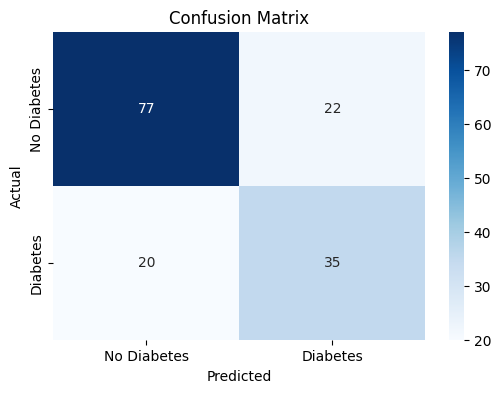

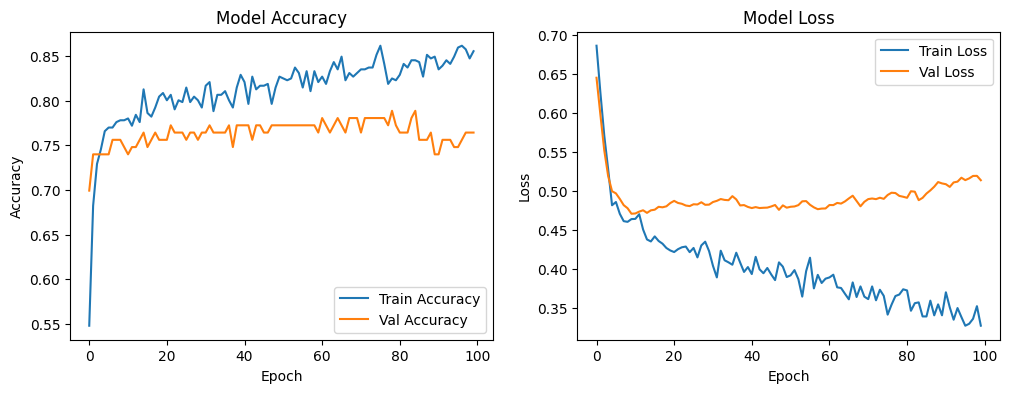

Please enter the following health data for diabetes prediction:
Pregnancies: 0
Glucose: 43
Blood Pressure: 112
Skin Thickness: 22
Insulin: 0
BMI: 23.3
Diabetes Pedigree Function: 0.23
Age: 41
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

The AI model predicts that the patient has a low risk of diabetes.


In [ ]:
if __name__ == "__main__":
    main()